Multiple Linear Regression


In [28]:
import pandas as pd
df=pd.read_csv('Health Insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
#converting category into numbers using [.cat.codes]
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
#age,smoker,sex,children,reigon are training featurs
#charges are going to be predicted
x= df.drop(columns ='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [32]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
c=lr.intercept_
c

-11827.7331417957

In [37]:
m=lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [38]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

Text(0, 0.5, 'Predicted charges')

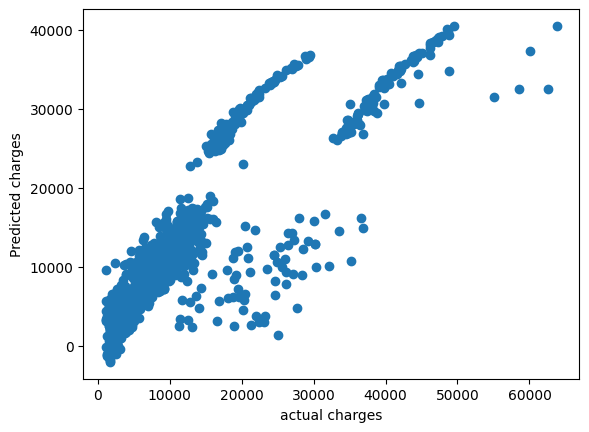

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("actual charges")
plt.ylabel("Predicted charges")

In [40]:
print(len(y_train), len(y_pred_train))


936 936


In [41]:
import numpy as np

# Check for NaNs or infinity values in y_train
print("NaNs in y_train:", np.isnan(y_train).any())
print("Infinite values in y_train:", np.isinf(y_train).any())

# Check for NaNs or infinity values in y_pred_train
print("NaNs in y_pred_train:", np.isnan(y_pred_train).any())
print("Infinite values in y_pred_train:", np.isinf(y_pred_train).any())


NaNs in y_train: False
Infinite values in y_train: False
NaNs in y_pred_train: False
Infinite values in y_pred_train: False


In [42]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7306840408360217

In [43]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

Text(0, 0.5, 'Predicted charges')

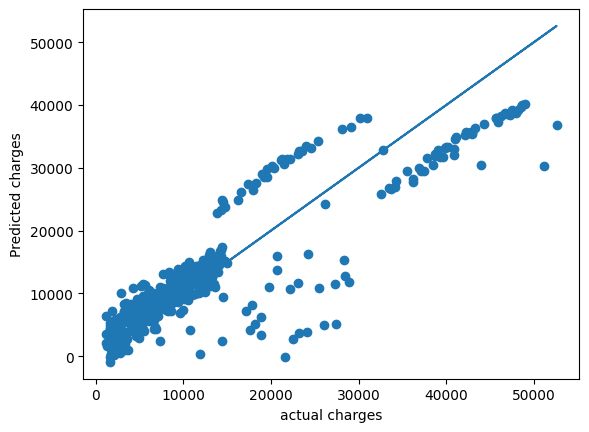

In [51]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.plot(y_test,y_test)


plt.xlabel("actual charges")
plt.ylabel("Predicted charges")

In [45]:
r2_score(y_test,y_pred_test)

0.7911113876316934

In [46]:
y_pred_train= m*x_train+c
y_pred_train

,age,sex,bmi,children,smoker,region
1163,-7209.342428,-11827.733142,-2544.326184,-11827.733142,-11827.733142,-11827.733142
196,-1821.219928,-11827.733142,-1035.751989,-11827.733142,-11827.733142,-12656.680428
438,1514.284477,-11827.733142,3554.130239,-9432.308150,-11827.733142,-12380.364666
183,-538.333618,-11827.733142,-3138.214171,-11827.733142,-11827.733142,-12104.048904
1298,-3360.683499,-11877.125466,-2794.384283,-10869.563145,-11827.733142,-12104.048904
...,...,...,...,...,...,...
763,-4900.147071,-11877.125466,-3263.243221,-11827.733142,-11827.733142,-11827.733142
835,-1051.488142,-11877.125466,7.253507,-10869.563145,-11827.733142,-12380.364666
1216,-1564.642666,-11877.125466,-3575.815846,-11827.733142,-11827.733142,-12380.364666
559,-6952.765166,-11877.125466,-137.516972,-11827.733142,-11827.733142,-12104.048904


In [47]:
y_pred_train1=lr.predict(x_train)
y_pred_train1

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

ValueError: x and y must be the same size

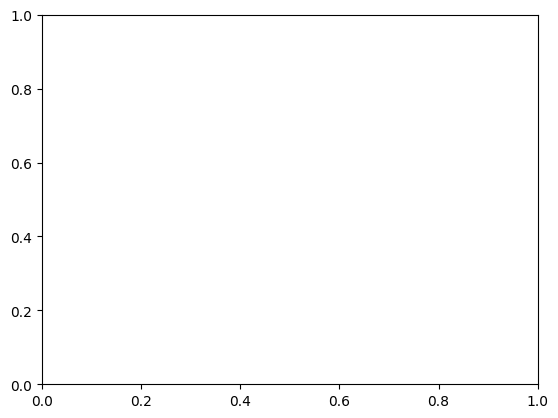

In [48]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train1,color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()